Filtering criteria:

min.cells = 1000 per study
min.gene = 500
min.umi = 1000
max.MT = 30

# 1. Preprocess

In [1]:
library(Seurat)
library(DoubletFinder)
library(HGNChelper)
library(tidyverse)
library(here)

library(CelliD)
library(harmony)
library(future)
source(here("notebooks/helper.R"))

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.4.1 but the current version is 4.4.2; it is recomended that you
reinstall ‘SeuratObject’ as the ABI for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.5 but the current version is 1.7.1; it is recomended
that you reinstall ‘SeuratObject’ as the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Please cite our software :) 
 
 Sehyun Oh et al. HGNChelper: identification and correction of invalid gene symbols for human and mouse. F1000Research 2020, 9:1493. DOI: https://doi.org/10.12688/f1000research.28033.1 
 
 Type `citation('HGNChelper')` for a BibTeX entry.

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot

In [20]:
files <- list.files(here("data/cptac"), full.names = TRUE, recursive = TRUE, ignore.case = TRUE)
files <- files[grep("filtered_feature_bc_matrix", files)]
files <- unique(dirname(files))
names(files) <- str_extract(files, "(?<=/cptac/)[^/]+")

In [23]:
objs <- list()
for (i in 1:length(files)){
    mat <- Read10X(files[[i]])
    obj <- CreateSeuratObject(counts = mat, min.features = 500, min.cells = 5, project = names(files[i]))
    objs <- append(objs, list(obj))
}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with da

In [28]:
for(i in 1:length(objs)){
    objs[[i]][["percent.MT"]]  <- PercentageFeatureSet(objs[[i]], pattern = "^MT-") 
    objs[[i]] <- subset(objs[[i]], subset = percent.MT < 30 & nCount_RNA > 1000)
}

In [29]:
objs <- lapply(objs, seuPreProcess)

Normalizing layer: counts

Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_RNA_ to pcaRNA_”
Warning message:
“The following arguments are not used: force.recalc”
Warning message:
“The following arguments are not used: force.recalc”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Normalizing layer: counts

Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_RNA_ to pcaRNA_”
Warning message:
“The following arguments are not used: force.recalc”
Warning message:
“The following arguments are not used: force.recalc”
Normalizing layer: counts

Centering and s

 ############################################
 ### DoubletFinder for dataset number  1 ###
 ############################################


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: ROCR

Loading required package: fields

Loading required package: spam

Spam version 2.11-0 (2024-10-03) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridisLite


Try help(fields) to get started.

Loading required package: parallel



NULL
 ############################################
 ### DoubletFinder for dataset number  2 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted sy

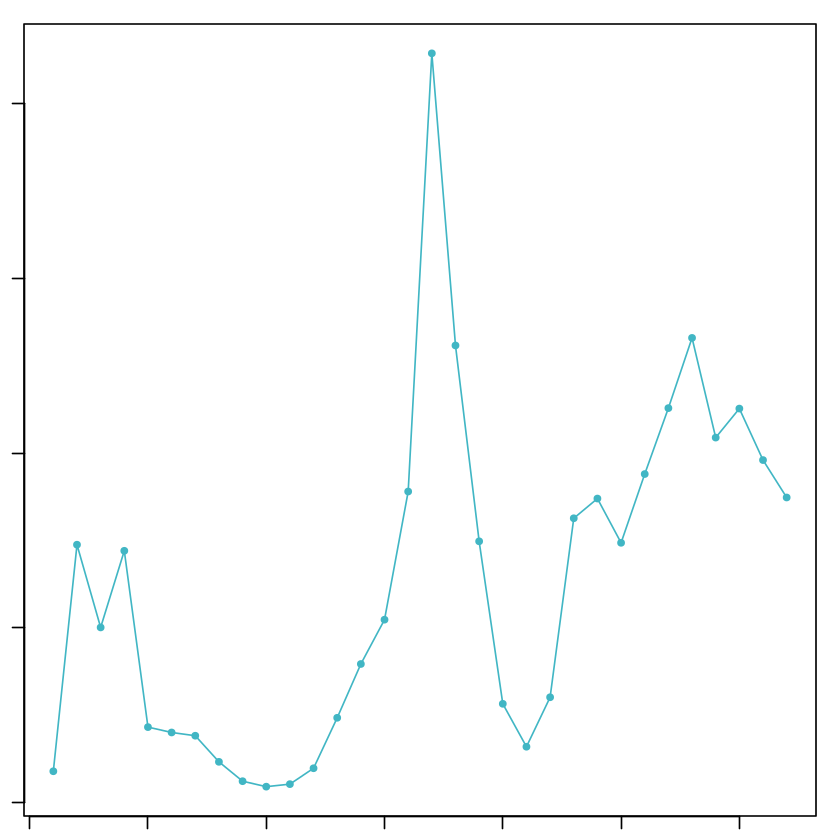

NULL
 ############################################
 ### DoubletFinder for dataset number  3 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Creating artificial doublets for pN = 30%"
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat obje

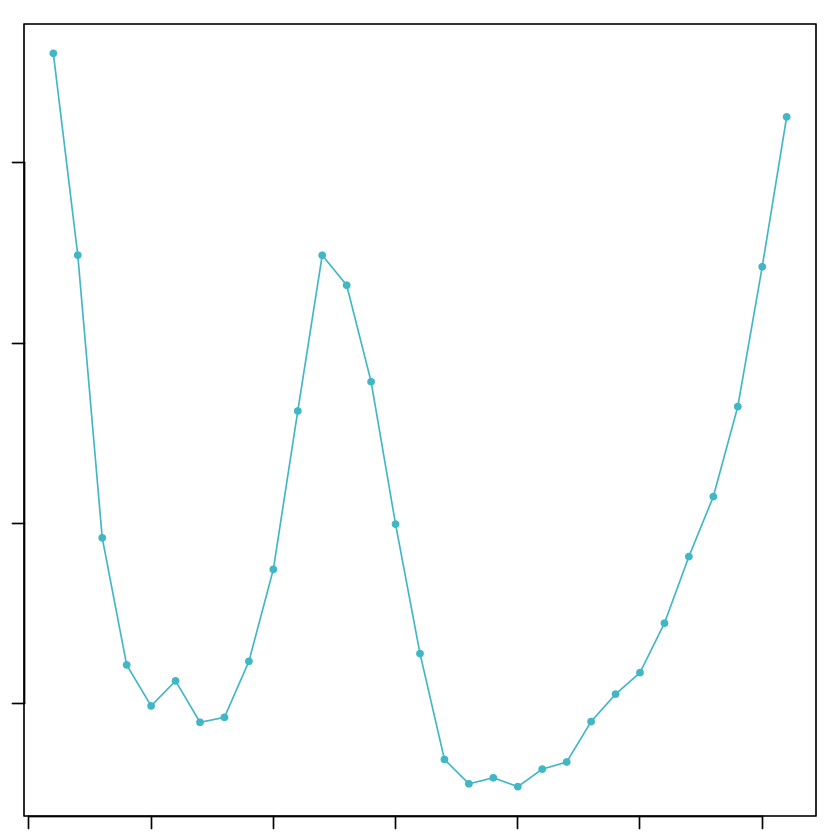

NULL
 ############################################
 ### DoubletFinder for dataset number  4 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating artificial doublets for pN = 30%"
[1] "Normalizing Seurat object..."
[1] "Creating Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat obje

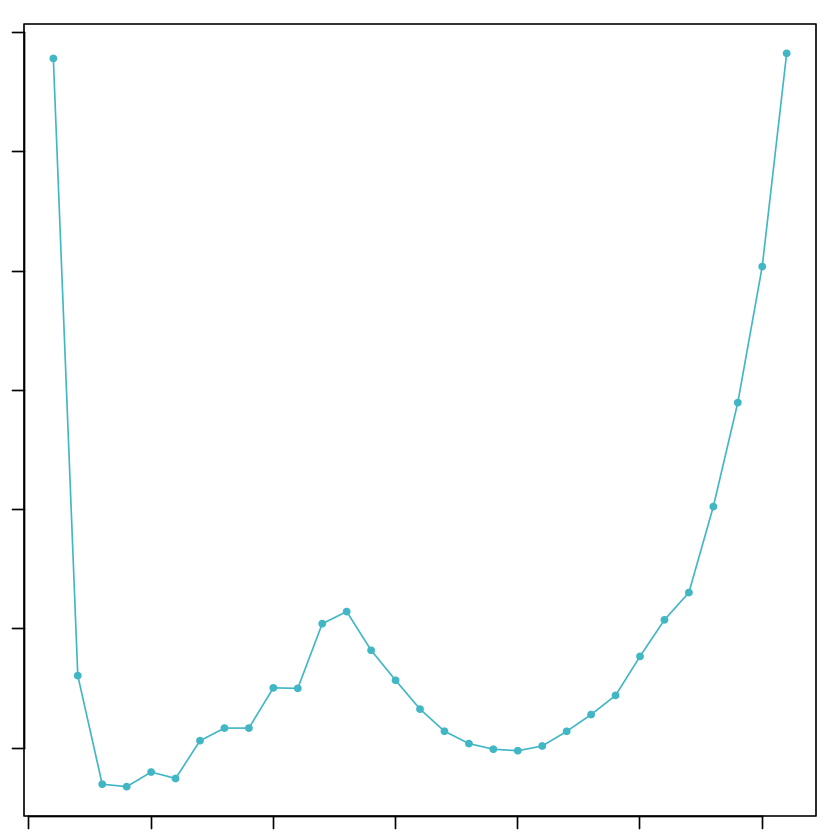

NULL
 ############################################
 ### DoubletFinder for dataset number  5 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat obje

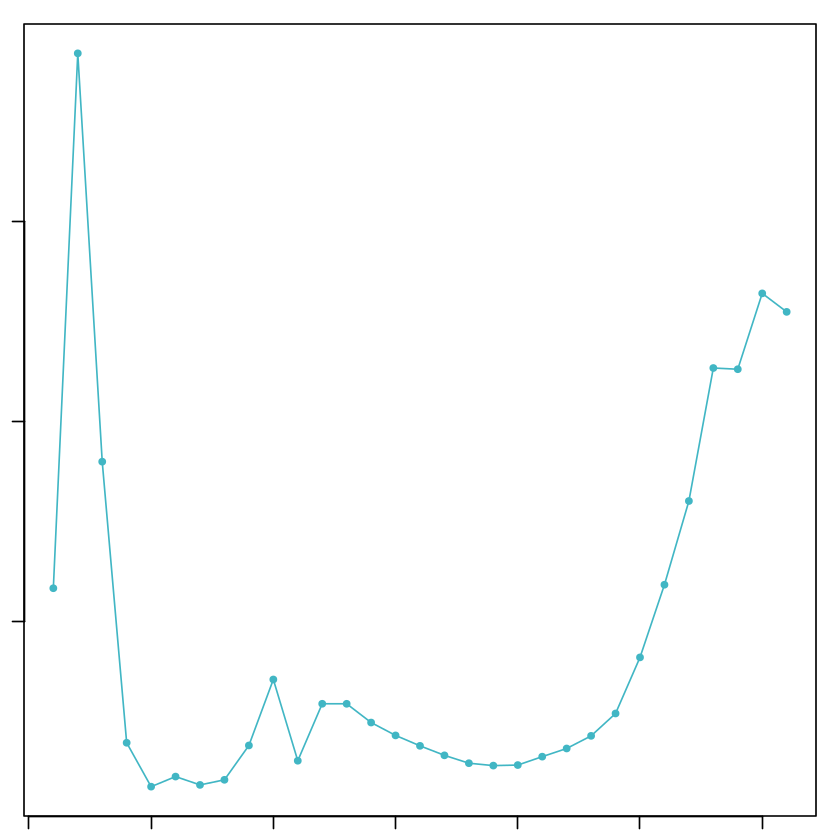

NULL
 ############################################
 ### DoubletFinder for dataset number  6 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat obje

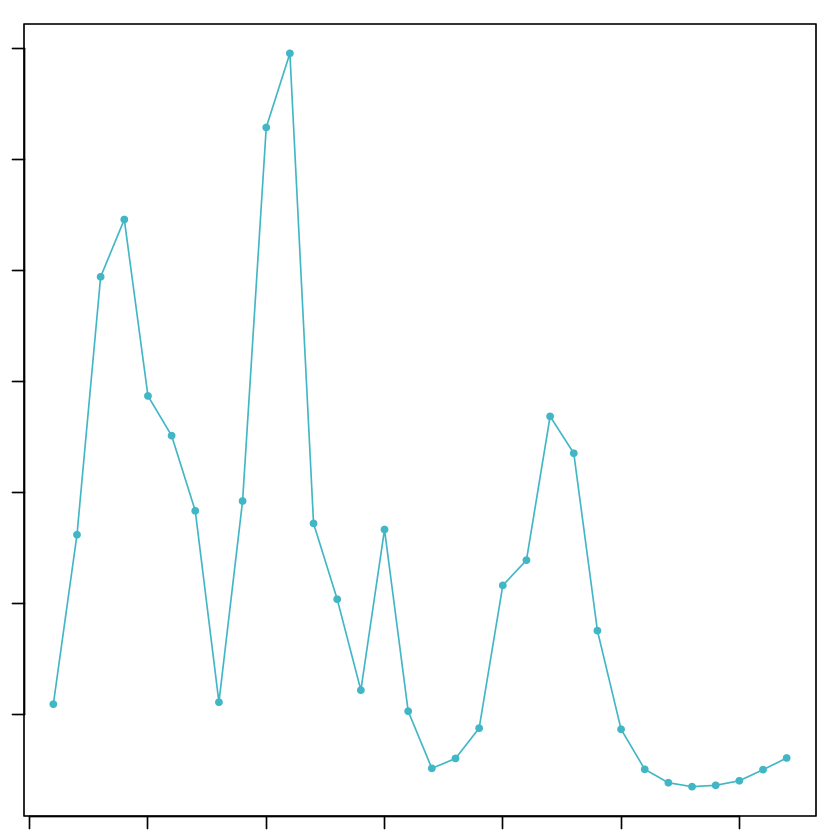

NULL
 ############################################
 ### DoubletFinder for dataset number  7 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat obje

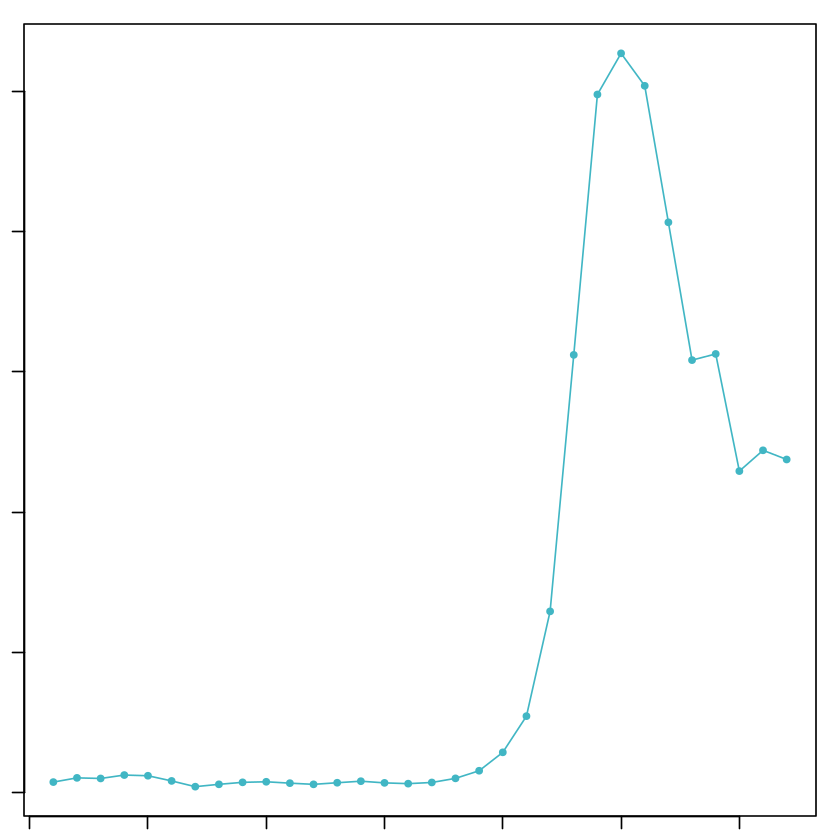

NULL
 ############################################
 ### DoubletFinder for dataset number  8 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat obje

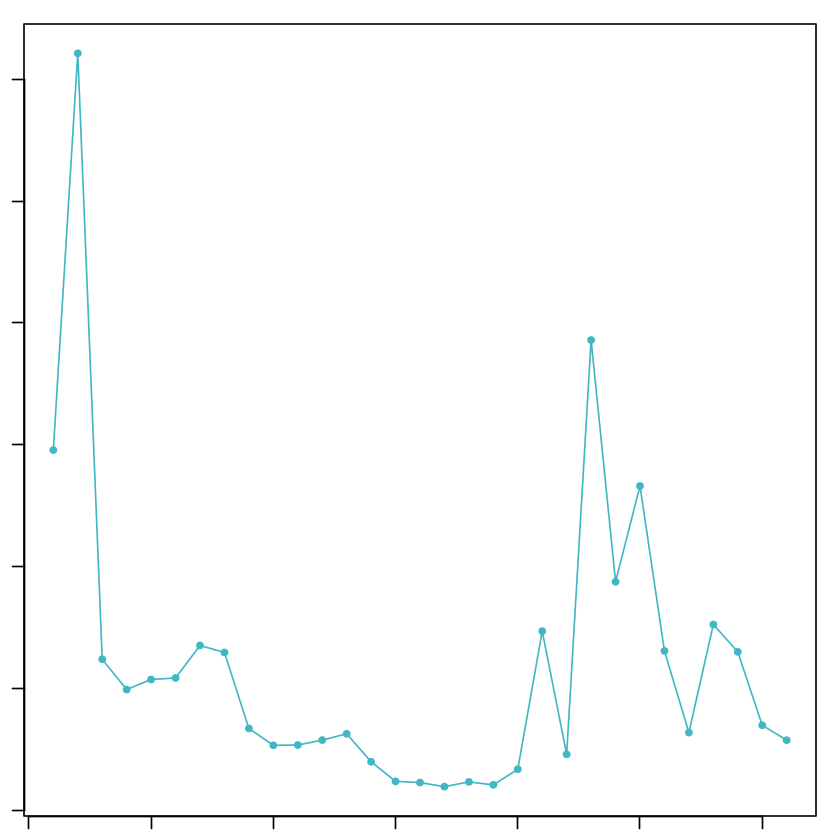

NULL
 ############################################
 ### DoubletFinder for dataset number  9 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat obje

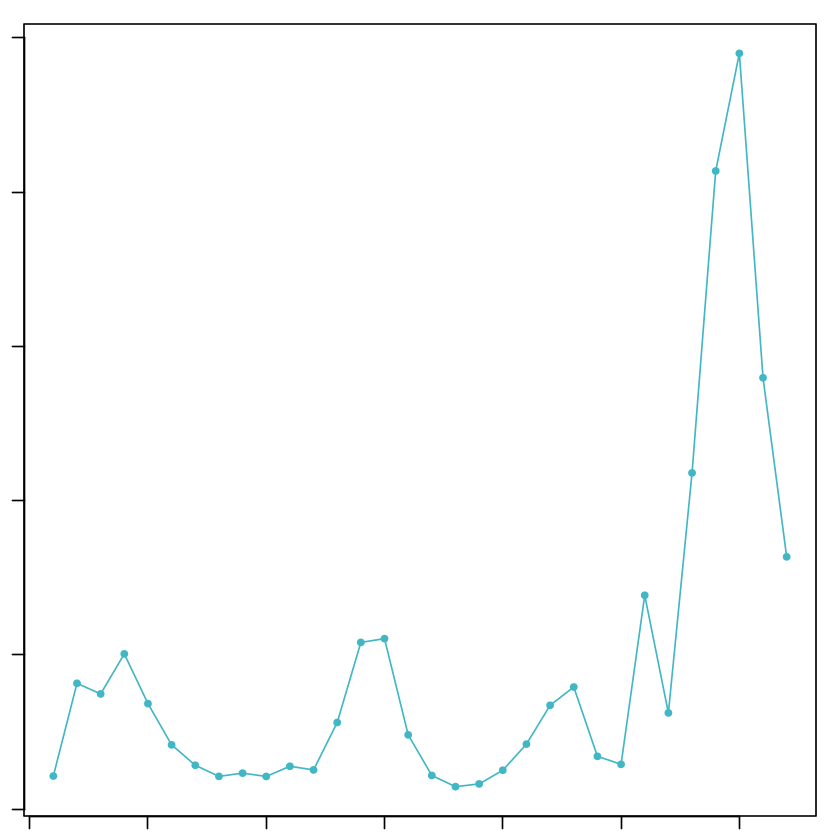

NULL
 ############################################
 ### DoubletFinder for dataset number  10 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat obj

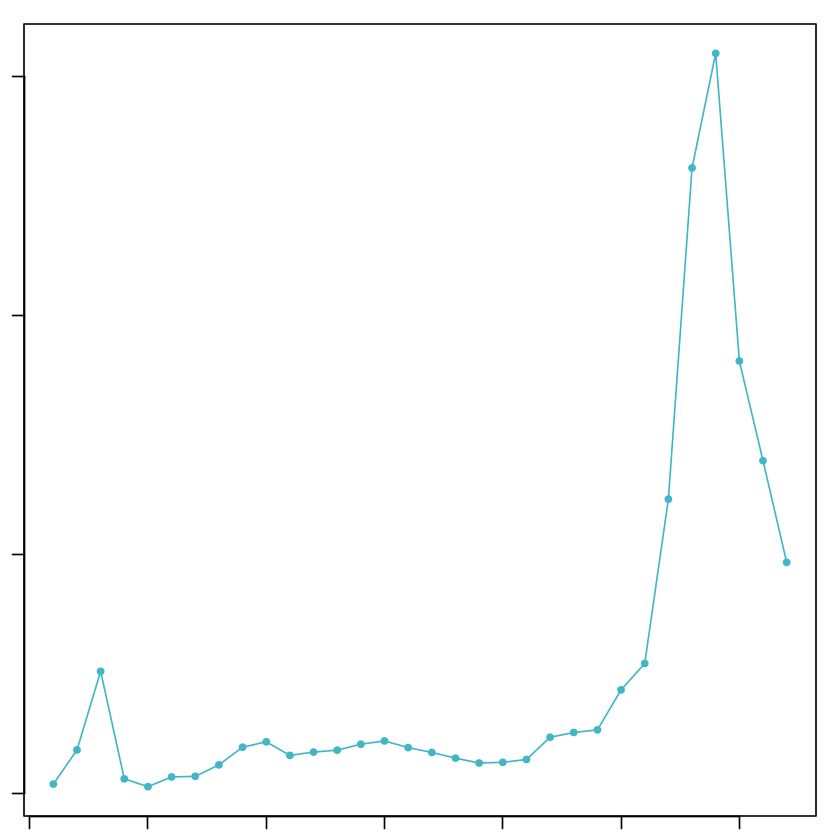

NULL
 ############################################
 ### DoubletFinder for dataset number  11 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Creating artificial doublets for pN = 20%"
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Normalizing Seurat 

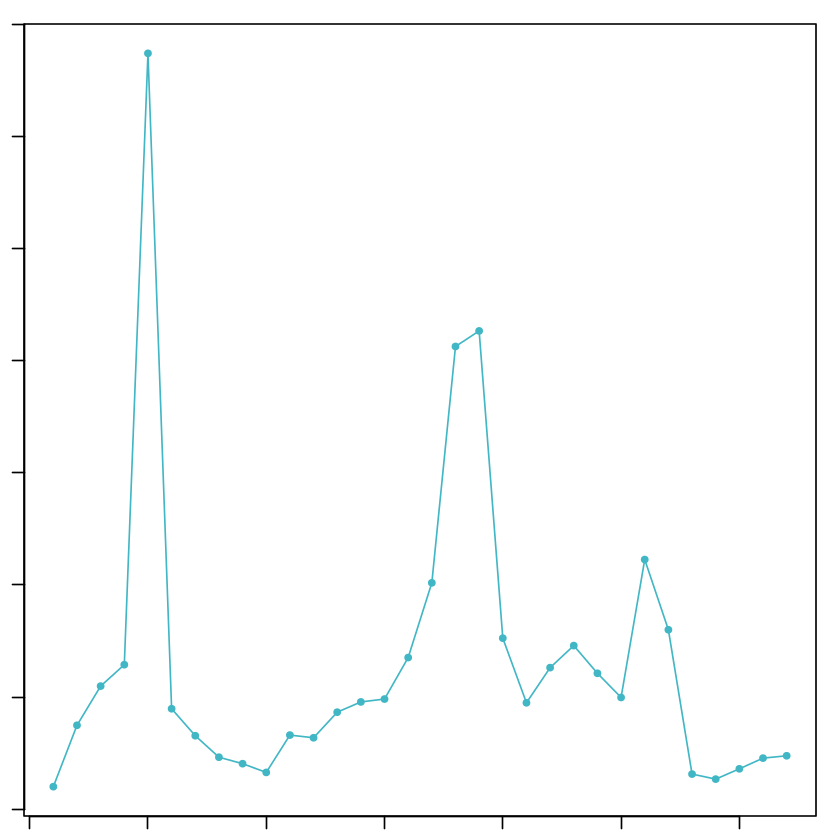

NULL
 ############################################
 ### DoubletFinder for dataset number  12 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat obj

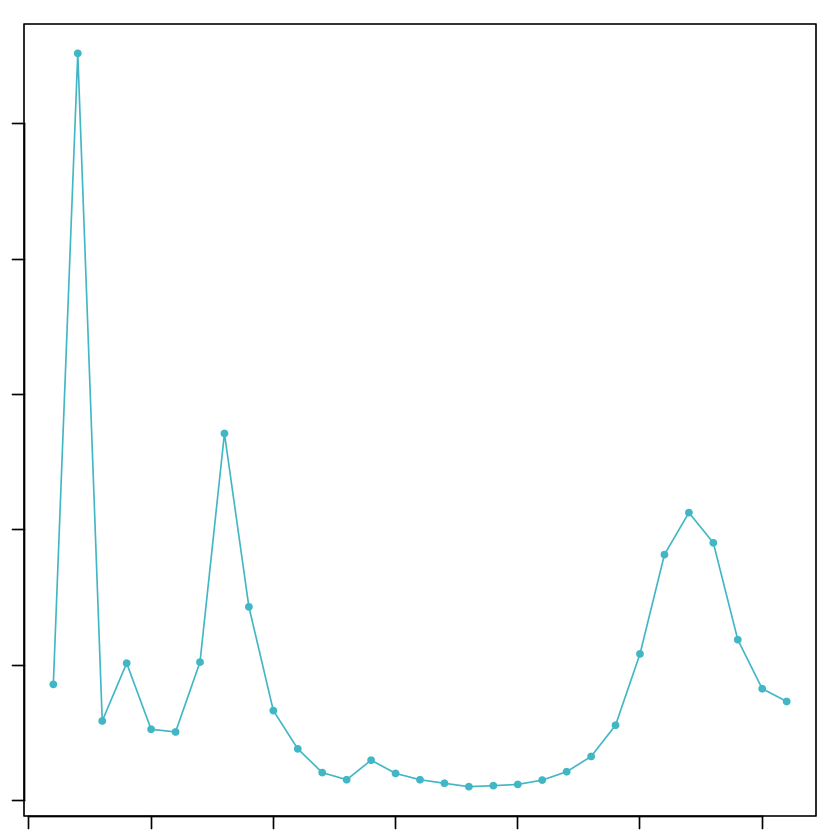

NULL
 ############################################
 ### DoubletFinder for dataset number  13 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat obj

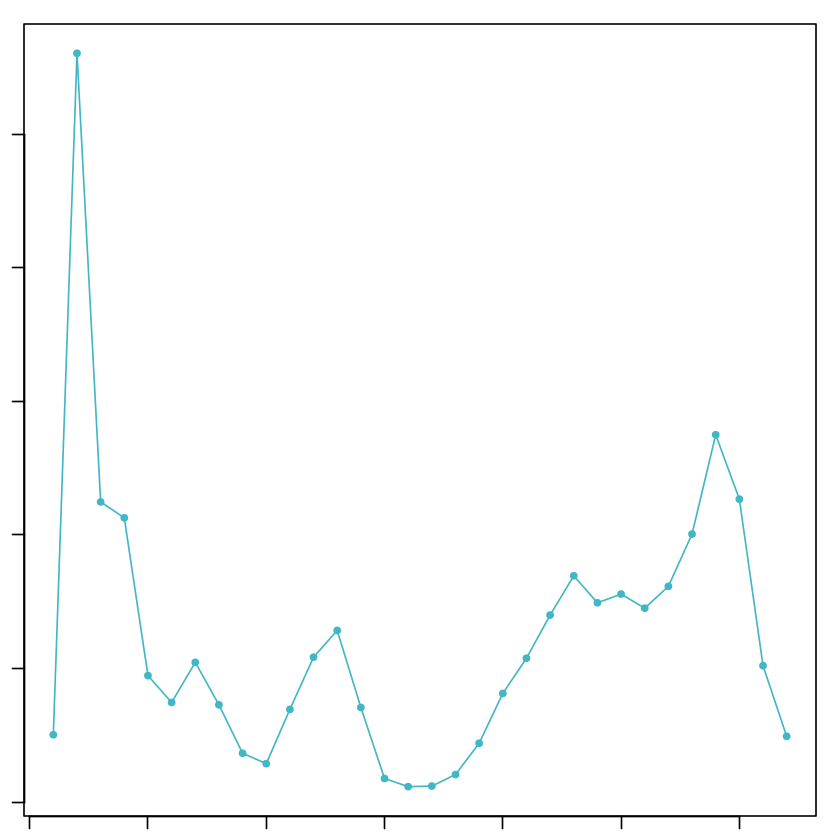

NULL
 ############################################
 ### DoubletFinder for dataset number  14 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat obj

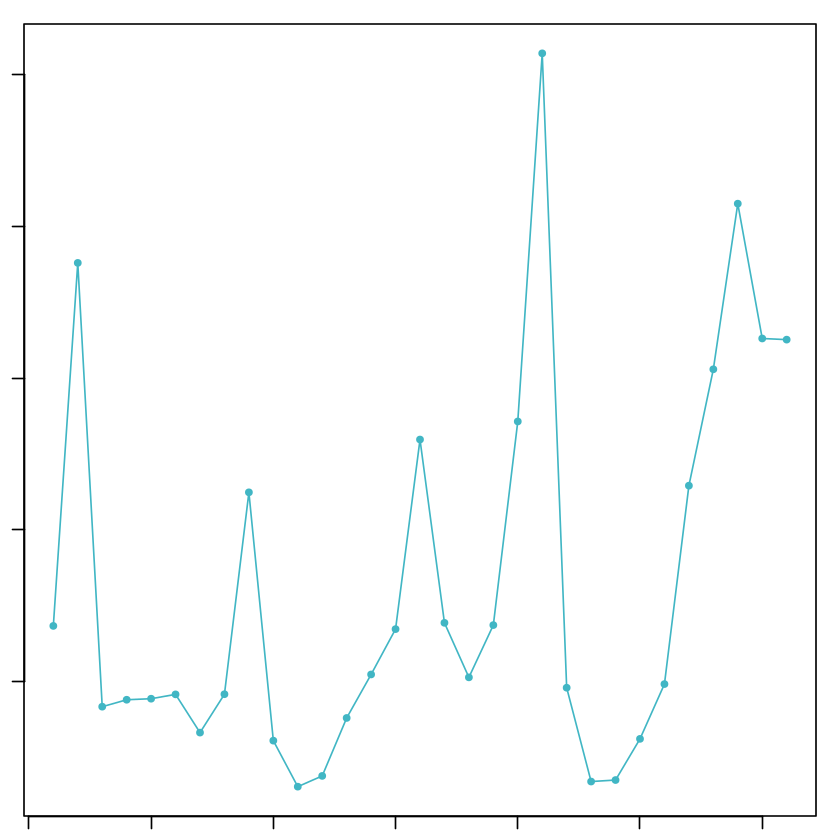

NULL
 ############################################
 ### DoubletFinder for dataset number  15 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Normalizing Seurat object..."
[1] "Creating artificial doublets for pN = 30%"
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Normalizing Seurat 

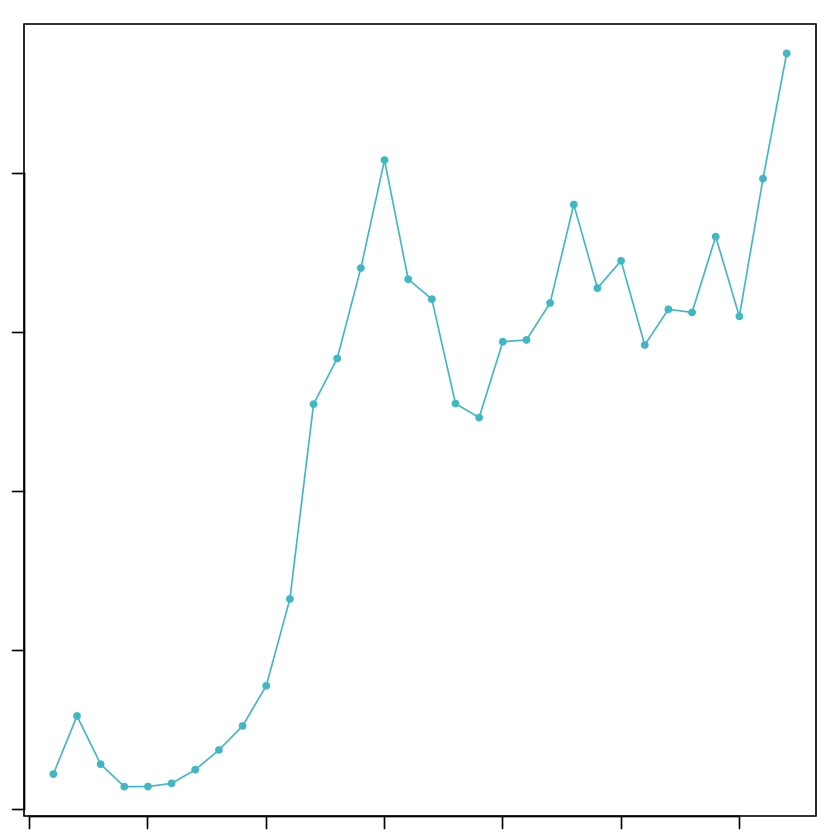

NULL
 ############################################
 ### DoubletFinder for dataset number  16 ###
 ############################################
[1] "Creating artificial doublets for pN = 5%"
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
[1] "Creating Seurat obj

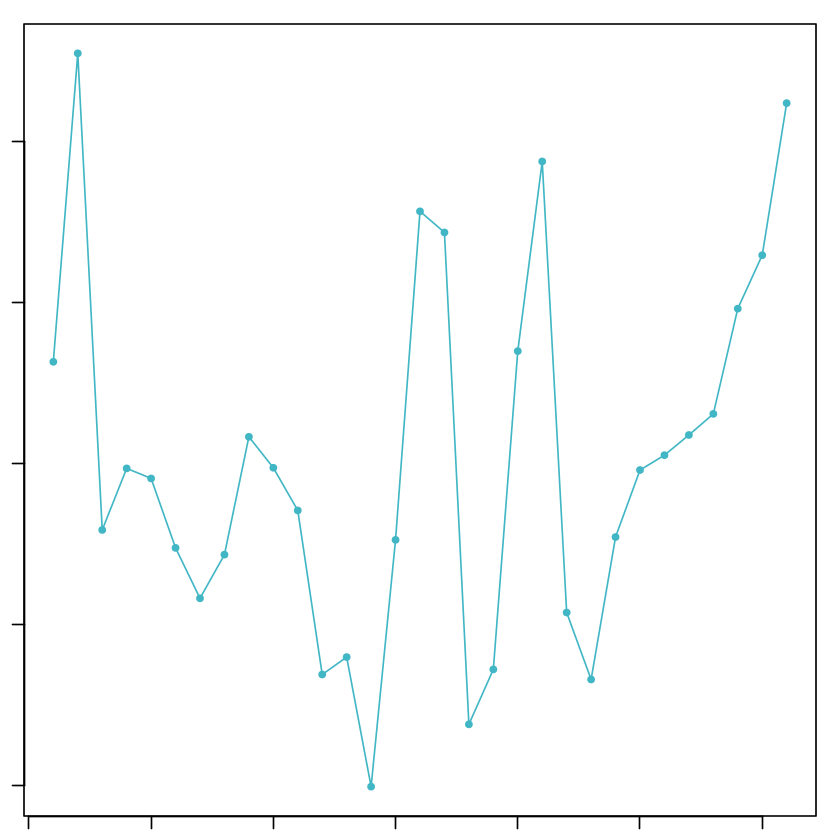

NULL


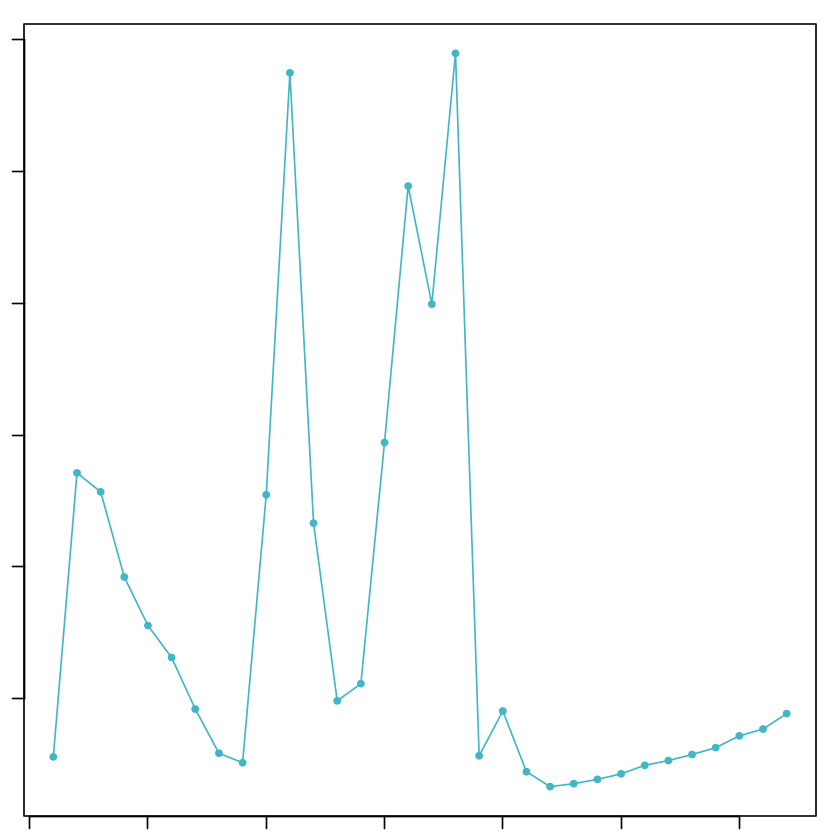

In [30]:
bcmvn <- list()
pK <- list()
homotypic.prop <- list()
nExp_poi <- list()
nExp_poi.adj <- list()

# Estimated Doublet Rate for each dataset
edr <- estimateDoubletRate.DWM(seur.list = objs)/100 #use your own known EDR here

for(i in 1:length(objs)){
  cat(' ############################################\n',
      '### DoubletFinder for dataset number ', i, '###\n',
      '############################################\n')
  
  ## pK Identification (no ground-truth)
  bcmvn[[i]]<- paramSweep(
    seu=objs[[i]],
    PCs = 1:objs[[i]]@reductions$umap_RNA@misc$n.pcs.used, 
    num.cores = 64
  ) %>% summarizeSweep(
    GT = FALSE
  ) %>% find.pK() 
  
  # Pull out max of bcmvn
  pK[[i]] <- as.numeric(as.character(bcmvn[[i]]$pK[bcmvn[[i]]$BCmetric==max(bcmvn[[i]]$BCmetric)]))
  
  ## Homotypic Doublet Proportion Estimate
  homotypic.prop[[i]] <- modelHomotypic(objs[[i]]$seurat_clusters) 
  
  nExp_poi[[i]] <- round(edr[[i]]*length(colnames(objs[[i]])))  
  nExp_poi.adj[[i]] <- round(nExp_poi[[i]]*(1-homotypic.prop[[i]]))
}

In [31]:
# Run DoubletFinder
for(i in 1:length(objs)){
  objs[[i]] <- 
    doubletFinder_V3.DWM_v2( # just changed it so the output metadata column name is customizable
      seu=objs[[i]], 
      PCs = 1:objs[[i]]@reductions$umap_RNA@misc$n.pcs.used,
      pN = 0.25, #default value
      pK= pK[[i]], 
      nExp = nExp_poi.adj[[i]],  
      reuse.pANN = F, 
      classification.name='DF.individual', 
      pANN.name='DF.pANN.individual'
    )
}

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


Creating  3743  artificial doublets from  11229  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  14972  
   k =  2246  
Classifying doublets...
Creating  1339  artificial doublets from  4018  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  5357  
   k =  27  
Classifying doublets...
Creating  2349  artificial doublets from  7046  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  9395  
   k =  2818  
Classifying doublets...
Creating  1919  artificial doublets from  5757  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  7676  
   k =  77  
Classifying doublets...
Creating  4314  artificial doublets from  12942  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  17256  
   k =  1553  
Classifying doublets...
Creating  4010  artificial doublets from  12031  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  16041  
   k =  3689  
Classifying doublets...
Creating  2517  artificial doublets from  7552  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  10069  
   k =  101  
Classifying doublets...
Creating  5608  artificial doublets from  16823  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  22431  
   k =  6281  
Classifying doublets...
Creating  3827  artificial doublets from  11480  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  15307  
   k =  4133  
Classifying doublets...
Creating  4825  artificial doublets from  14475  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  19300  
   k =  579  
Classifying doublets...
Creating  1517  artificial doublets from  4551  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  6068  
   k =  61  
Classifying doublets...
Creating  5840  artificial doublets from  17519  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  23359  
   k =  117  
Classifying doublets...
Creating  2439  artificial doublets from  7318  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  9757  
   k =  1951  
Classifying doublets...
Creating  4207  artificial doublets from  12622  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  16829  
   k =  5049  
Classifying doublets...
Creating  1255  artificial doublets from  3766  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  5021  
   k =  50  
Classifying doublets...
Creating  4013  artificial doublets from  12039  cells...
Creating Seurat object with artificial doublets...


Normalizing layer: counts



     Piping FindVariableFeatures(), ScaleData(), and RunPCA()...


Finding variable features for layer counts

Centering and scaling data matrix



Calculating PC distance matrix...
Computing pANN...
   nCells =  16052  
   k =  2568  
Classifying doublets...


In [32]:
cptac <- merge(objs[[1]], y = unlist(objs[2:length(objs)]), add.cell.ids = names(files), project = "cptac", merge.data = T)

In [33]:
gene.names <- checkGeneSymbols(rownames(cptac), unmapped.as.na=FALSE)
rownames(cptac) <- make.unique(gene.names$Suggested.Symbol)

Maps last updated on: Sat Nov 16 10:35:32 2024

Warning message in checkGeneSymbols(rownames(cptac), unmapped.as.na = FALSE):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(rownames(cptac), unmapped.as.na = FALSE):
“x contains non-approved gene symbols”


In [34]:
cptac

An object of class Seurat 
39817 features across 161168 samples within 1 assay 
Active assay: RNA (39817 features, 2000 variable features)
 48 layers present: counts.C3L-02705, counts.C3L-03405, counts.C3L-03968, counts.C3N-00662, counts.C3N-01798, counts.C3N-01814, counts.C3N-01815, counts.C3N-01816, counts.C3N-02181, counts.C3N-02188, counts.C3N-02190, counts.C3N-02783, counts.C3N-02784, counts.C3N-03184, counts.C3N-03186, counts.C3N-03188, data.C3L-02705, scale.data.C3L-02705, data.C3L-03405, scale.data.C3L-03405, data.C3L-03968, scale.data.C3L-03968, data.C3N-00662, scale.data.C3N-00662, data.C3N-01798, scale.data.C3N-01798, data.C3N-01814, scale.data.C3N-01814, data.C3N-01815, scale.data.C3N-01815, data.C3N-01816, scale.data.C3N-01816, data.C3N-02181, scale.data.C3N-02181, data.C3N-02188, scale.data.C3N-02188, data.C3N-02190, scale.data.C3N-02190, data.C3N-02783, scale.data.C3N-02783, data.C3N-02784, scale.data.C3N-02784, data.C3N-03184, scale.data.C3N-03184, data.C3N-03186, scale

In [35]:
cptac <- subset(cptac, subset = DF.individual == 'Singlet')

In [38]:
cptac$author <- "cptac"
cptac$donor_id <- cptac$orig.ident
cptac$method <- "nuclei"
cptac$assay <- "10x 3' v3"

In [40]:
saveRDS(cptac, here("output/cptac.rds"))

# 2. CellID

In [2]:
obj <- readRDS(here("output/cptac.rds"))
obj

An object of class Seurat 
39817 features across 147867 samples within 1 assay 
Active assay: RNA (39817 features, 2000 variable features)
 48 layers present: counts.C3L-02705, counts.C3L-03405, counts.C3L-03968, counts.C3N-00662, counts.C3N-01798, counts.C3N-01814, counts.C3N-01815, counts.C3N-01816, counts.C3N-02181, counts.C3N-02188, counts.C3N-02190, counts.C3N-02783, counts.C3N-02784, counts.C3N-03184, counts.C3N-03186, counts.C3N-03188, data.C3L-02705, scale.data.C3L-02705, data.C3L-03405, scale.data.C3L-03405, data.C3L-03968, scale.data.C3L-03968, data.C3N-00662, scale.data.C3N-00662, data.C3N-01798, scale.data.C3N-01798, data.C3N-01814, scale.data.C3N-01814, data.C3N-01815, scale.data.C3N-01815, data.C3N-01816, scale.data.C3N-01816, data.C3N-02181, scale.data.C3N-02181, data.C3N-02188, scale.data.C3N-02188, data.C3N-02190, scale.data.C3N-02190, data.C3N-02783, scale.data.C3N-02783, data.C3N-02784, scale.data.C3N-02784, data.C3N-03184, scale.data.C3N-03184, data.C3N-03186, scale

In [3]:
obj <- JoinLayers(obj)

In [5]:
obj <- obj %>% NormalizeData(verbose = FALSE) %>% FindVariableFeatures(verbose = FALSE) %>% ScaleData(verbose = FALSE) %>% RunMCA(verbose = FALSE) %>% RunPCA(verbose = FALSE)

Warning message:
“Different features in new layer data than already exists for scale.data”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 43.9 GiB”
Computing Fuzzy Matrix



272.015 sec elapsed


Computing SVD



135.555 sec elapsed


Computing Coordinates



69.671 sec elapsed


In [6]:
obj <- RunHarmony(obj, group.by.vars = "donor_id", verbose = FALSE)

In [7]:
obj <- obj %>% RunUMAP(reduction = "harmony", dims = 1:30, verbose = FALSE) %>% FindNeighbors(reduction = "harmony", dims = 1:30, verbose = FALSE) %>% FindClusters(verbose = FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [8]:
signatures <- as.data.frame(readxl::read_excel(here('markers/gbmap.xlsx'), sheet = "S2"))
signatures <- signatures[-1:-2,] %>% `rownames<-` (NULL)
signatures.list <- list()
for(i in 1:length(colnames(signatures))){
  tmp <- list(na.omit(signatures[[i]]))
  signatures.list <- append(signatures.list, tmp)
}
names(signatures.list) <- colnames(signatures)

In [12]:
# saveRDS(obj, here("output/cptac2.rds"))

An object of class Seurat 
39817 features across 147867 samples within 1 assay 
Active assay: RNA (39817 features, 2000 variable features)
 3 layers present: scale.data, data, counts
 4 dimensional reductions calculated: mca, pca, harmony, umap

In [11]:
HGT_gbm_gs <- RunCellHGT(obj, pathways = signatures.list, dims = 1:50, n.features = 200)
gs_prediction <- rownames(HGT_gbm_gs)[apply(HGT_gbm_gs, 2, which.max)]
gs_prediction_signif <- ifelse(apply(HGT_gbm_gs, 2, max)>2, yes = gs_prediction, "unassigned")
obj$gs_prediction_main <- gs_prediction_signif


calculating distance




ERROR: Error: Mat::init(): requested size is too large; suggest to enable ARMA_64BIT_WORD


In [ ]:
DimPlot(obj, group.by =  "gs_prediction_main", reduction = "umap", label = TRUE) 

In [ ]:
DimPlot(obj, group.by =  "orig.ident", reduction = "umap", label = TRUE) 

In [ ]:
saveRDS(obj, here("output/cptac2.rds"))

# 3. Copykat & Annotation